In [188]:
import sys
sys.path.append('../..')

import numpy as np
import choix

from config import client

In [189]:
osu_db = client['osu_random_db']

In [190]:
comps = np.load("comparisons_3k.npy")

In [191]:
unique, counts = np.unique(comps, return_counts = True)

freq = np.asarray((unique, counts)).T
freq = freq[np.argsort(-freq[:, 1])]

top_ids = list(freq[:1000][:, 0].tolist())
top_ids_set = set(top_ids)

In [192]:
filtered_comps = np.array(list(filter(lambda comp: comp[0] in top_ids_set and comp[1] in top_ids_set, comps.tolist())))

In [193]:
index = {bm_id: i for i, bm_id in enumerate(top_ids)}

In [194]:
to_index = np.vectorize(lambda bm_id: index[bm_id])

In [195]:
index_comps = to_index(filtered_comps)

In [196]:
params = choix.lsr_pairwise(1000, index_comps, alpha=.0001)

In [197]:
from matplotlib import pyplot as plt

(array([ 4.,  4.,  8., 14., 20., 23., 27., 29., 36., 44., 56., 37., 48.,
        56., 68., 50., 54., 59., 41., 43., 39., 45., 37., 30., 28., 22.,
        22., 14., 12.,  4.,  6.,  4.,  3.,  2.,  1.,  3.,  2.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.]),
 array([-3.05513974, -2.86344291, -2.67174607, -2.48004924, -2.28835241,
        -2.09665558, -1.90495874, -1.71326191, -1.52156508, -1.32986825,
        -1.13817141, -0.94647458, -0.75477775, -0.56308092, -0.37138408,
        -0.17968725,  0.01200958,  0.20370641,  0.39540325,  0.58710008,
         0.77879691,  0.97049374,  1.16219058,  1.35388741,  1.54558424,
         1.73728107,  1.92897791,  2.12067474,  2.31237157,  2.5040684 ,
         2.69576524,  2.88746207,  3.0791589 ,  3.27085573,  3.46255257,
         3.6542494 ,  3.84594623,  4.03764306,  4.2293399 ,  4.42103673,
         4.61273356,  4.80443039,  4.99612723,  5.18782406,  5.37952089,
         5.57121772,  5.76291456,  5.95461139,  6.14630822,

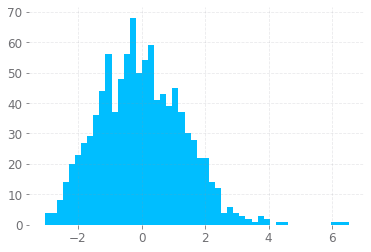

In [198]:
plt.hist(params, bins = 50)

In [212]:
new_diff = params + 3.4334830660000004

In [210]:
bms = list(osu_db['osu_beatmaps'].find({'_id': {'$in': top_ids}}))
bms.sort(key = lambda bm: index[bm['_id']])

In [217]:
for i in range(1000):
    bms[i]['new_difficulty'] = new_diff[i]
df = pd.DataFrame(bms)

In [219]:
df_slice = df[["_id", "filename", "new_difficulty", "difficultyrating"]]

In [220]:
params

,_id,filename,new_difficulty,difficultyrating
0,397536,Kuba Oms - My Love (W h i t e) [Normal].osu,1.656428,1.68301
1,351190,cYsmix feat. Emmy - Tear Rain (jonathanlfj) [N...,1.647620,1.84494
2,453359,Rameses B - Flaklypa (-kevincela-) [Normal].osu,2.024163,1.75883
3,315550,Rostik - Liquid (Paul Rosenthal Remix) (Charle...,1.164777,1.71815
4,397534,Kuba Oms - My Love (W h i t e) [Hard].osu,2.492378,2.67792
...,...,...,...,...
995,1036394,Sporty-O - Let Me Hit It (DeRandom Otaku) [Nor...,1.369269,1.93169
996,1498150,I SEE MONSTAS - Holdin On (Skrillex and Nero R...,3.701436,4.46414
997,345600,Jeff Williams - I Burn (feat. Casey Lee Willia...,5.335920,3.80678
998,1034482,namirin - Koi no Hime Hime Pettanko ([C u r i]...,4.845895,5.38669


In [222]:
df_slice.to_csv('beatmap_diff_ratings.csv')

In [248]:
%matplotlib widget

m, b = np.polyfit(bm_rating, new_diff, 1)
plt.scatter(bm_rating, new_diff, s = 10)
plt.plot(bm_rating, m*bm_rating + b, c='y')
plt.xlabel("Star Difficulty")
plt.ylabel("Bradley Terry")
plt.annotate('R-corr: .71', (1,9), weight = 'bold', fontsize=15)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(1, 9, 'R-corr: .71')